In [1]:
# Import necessary libraries
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.optim import SGD
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Step 1: Define the Neural Network (Initial random weights and biases)

class SimpleNN(nn.Module):
    def __init__(self):
        super().__init__()
        
        # Initialize weights and biases randomly
        self.w00 = nn.Parameter(torch.rand(1), requires_grad=True)
        self.b00 = nn.Parameter(torch.tensor(-0.5), requires_grad=True)
        
        self.w01 = nn.Parameter(torch.rand(1), requires_grad=True)
        self.b01 = nn.Parameter(torch.tensor(-1.5), requires_grad=True)
        
        self.w02 = nn.Parameter(torch.rand(1), requires_grad=True)
        self.b02 = nn.Parameter(torch.tensor(0.65), requires_grad=True)
        
        # Hidden layers weights
        self.w11 = nn.Parameter(torch.rand(1), requires_grad=True)
        self.w12 = nn.Parameter(torch.rand(1), requires_grad=True)
        self.w13 = nn.Parameter(torch.rand(1), requires_grad=True)
        
        # Output layer weight
        self.w20 = nn.Parameter(torch.rand(1), requires_grad=True)

    def forward(self, input):
        # Compute inputs to hidden layers
        input_to_layer_01 = input * self.w00 + self.b00
        layer_01_output = torch.sigmoid(input_to_layer_01) * self.w11
        
        input_to_layer_02 = input * self.w01 + self.b01
        layer_02_output = torch.sigmoid(input_to_layer_02) * self.w12
        
        input_to_layer_03 = input * self.w02 + self.b02
        layer_03_output = torch.sigmoid(input_to_layer_03) * self.w13
        
        # Combine outputs from hidden layers
        output = layer_01_output + layer_02_output + layer_03_output
        
        # Apply Tanh activation function in the output layer
        output = torch.tanh(output)
        
        # Final output
        output = output * self.w20
        
        return output


# Initialize the model
model = SimpleNN()

In [3]:
# Step 2: Generate some data (X values)
X = torch.linspace(1, 2.5, steps=40)

# Forward pass to get initial predictions
initial_predictions = model(X)

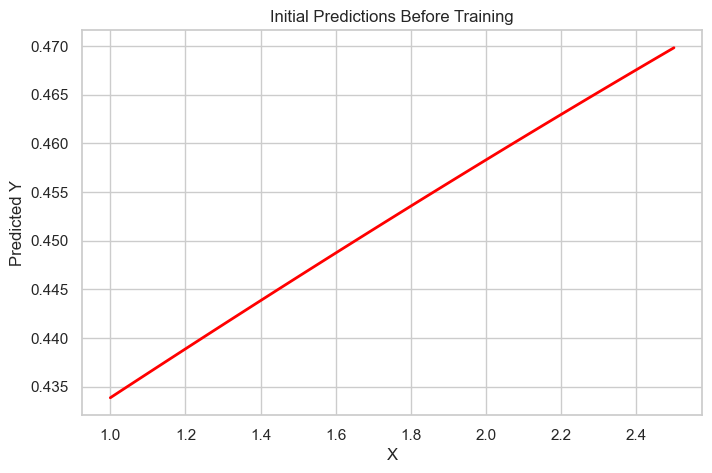

In [4]:
# Step 3: Plot initial predictions
sns.set(style="whitegrid")
plt.figure(figsize=(8, 5))
sns.lineplot(x=X.detach(), y=initial_predictions.detach(), color='red', linewidth=2)
plt.title("Initial Predictions Before Training")
plt.xlabel("X")
plt.ylabel("Predicted Y")
plt.show()

In [5]:
# Step 4: Define Loss Function and Optimizer
optimizer = SGD(model.parameters(), lr=0.01)
loss_fn = nn.MSELoss()

In [6]:
# Step 5: Training the Neural Network
epochs = 100  # Number of training epochs

# Generate some dummy target values (for illustration purposes)
# Let's assume the true function is similar to the initial model but smoother
true_model = lambda x: torch.tanh(x * 1.5 - 1) * 2
Y_true = true_model(X)

loss_history = []  # To track loss over epochs

for epoch in range(epochs):
    total_loss = 0.0
    
    for i in range(len(X)):
        # Take each input and its corresponding true output
        input_i = X[i]
        actual_output_i = Y_true[i]
        
        # Perform forward pass
        pred_output_i = model(input_i)
        
        # Calculate loss
        loss_value = loss_fn(pred_output_i, actual_output_i)
        
        # Backpropagation
        loss_value.backward()
        
        # Update weights
        optimizer.step()
        
        # Reset gradients for the next iteration
        optimizer.zero_grad()
        
        total_loss += loss_value.item()
    
    # Print total loss for each epoch
    print(f"Epoch {epoch+1}/{epochs}, Total Loss: {total_loss:.4f}")
    
    # Store loss for visualization
    loss_history.append(total_loss)

c:\Users\Administrator\AppData\Local\Programs\Python\Python312\Lib\site-packages\torch\nn\modules\loss.py:608: UserWarning: Using a target size (torch.Size([])) that is different to the input size (torch.Size([1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch 1/100, Total Loss: 41.2555
Epoch 2/100, Total Loss: 11.6225
Epoch 3/100, Total Loss: 4.2611
Epoch 4/100, Total Loss: 2.9646
Epoch 5/100, Total Loss: 2.8320
Epoch 6/100, Total Loss: 2.8615
Epoch 7/100, Total Loss: 2.8882
Epoch 8/100, Total Loss: 2.8979
Epoch 9/100, Total Loss: 2.8969
Epoch 10/100, Total Loss: 2.8902
Epoch 11/100, Total Loss: 2.8808
Epoch 12/100, Total Loss: 2.8700
Epoch 13/100, Total Loss: 2.8583
Epoch 14/100, Total Loss: 2.8462
Epoch 15/100, Total Loss: 2.8337
Epoch 16/100, Total Loss: 2.8209
Epoch 17/100, Total Loss: 2.8078
Epoch 18/100, Total Loss: 2.7943
Epoch 19/100, Total Loss: 2.7805
Epoch 20/100, Total Loss: 2.7664
Epoch 21/100, Total Loss: 2.7520
Epoch 22/100, Total Loss: 2.7373
Epoch 23/100, Total Loss: 2.7222
Epoch 24/100, Total Loss: 2.7068
Epoch 25/100, Total Loss: 2.6911
Epoch 26/100, Total Loss: 2.6749
Epoch 27/100, Total Loss: 2.6585
Epoch 28/100, Total Loss: 2.6416
Epoch 29/100, Total Loss: 2.6244
Epoch 30/100, Total Loss: 2.6068
Epoch 31/100, Tot

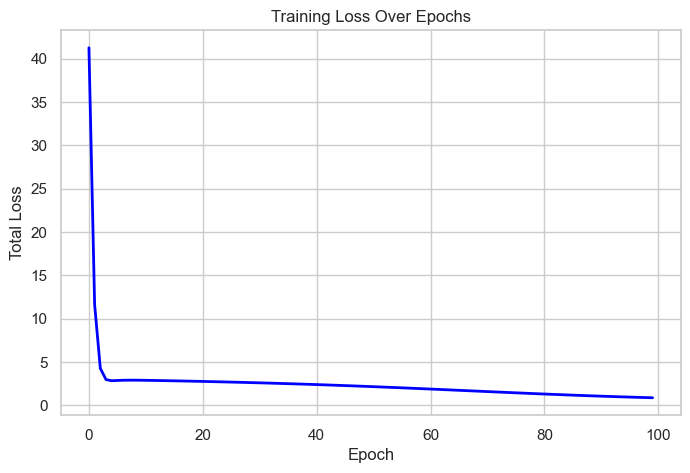

In [7]:
# Step 6: Plot Training Loss
plt.figure(figsize=(8, 5))
sns.lineplot(x=range(epochs), y=loss_history, color='blue', linewidth=2)
plt.title("Training Loss Over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Total Loss")
plt.show()

In [8]:
# Step 7: Final Predictions After Training
final_predictions = model(X)

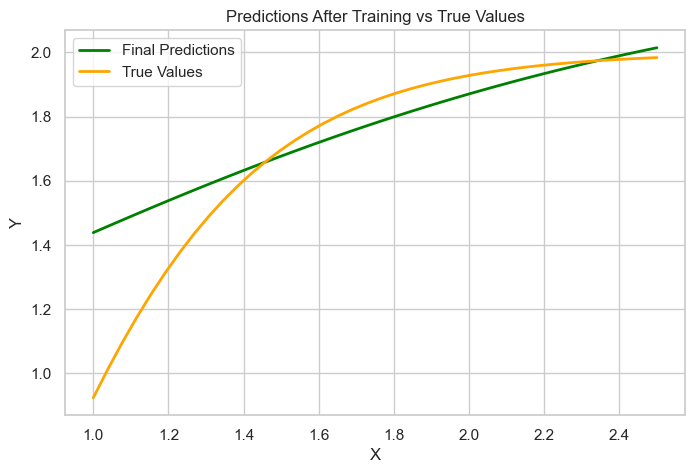

In [9]:
# Step 8: Plot final predictions after training
plt.figure(figsize=(8, 5))
sns.lineplot(x=X.detach(), y=final_predictions.detach(), color='green', label="Final Predictions", linewidth=2)
sns.lineplot(x=X.detach(), y=Y_true.detach(), color='orange', label="True Values", linewidth=2)
plt.title("Predictions After Training vs True Values")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.show()